In [29]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 1/np.sqrt(17), kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 1/np.sqrt(4), kernel_regularizer = 0.001)

    model.set_optimizer(optimizer)

    model.fit(X_train,
            Y_train, 
            epochs=1500, 
            #batch_size=31,
            #validation_data = [X_test, Y_test],
            verbose=verbose)

    return model 

# Monk 2 ln_maxiter = 10

In [44]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 189
ln_maxiter = 10
results = []

Load Monk DataSet


In [45]:
#############################
#          NCG pr
#############################

optimizer = NCG(beta_method="pr", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_pr = model.history 

Build the model

Alpha: 0.09115715839364258 - norm_g: 8.448834907889065
Epoch: 1 - time: 0.0050 - loss_train: 0.2474917425514084 - loss_val: 0

Beta: 0.9444691550833718 -> compute alpha: Alpha: 0.0011073472327028822 - norm_g: 5.0583770723692165
Epoch: 2 - time: 0.0040 - loss_train: 0.24767470429798022 - loss_val: 0

Beta: 0.0059651700895703656 -> compute alpha: Alpha: 0.08826146201322468 - norm_g: 5.08837105003423
Epoch: 3 - time: 0.0030 - loss_train: 0.2367711046617234 - loss_val: 0

Beta: 0.4340587577739113 -> compute alpha: Alpha: 0.0012036061751006038 - norm_g: 1.7074034497363009
Epoch: 4 - time: 0.0050 - loss_train: 0.2367808940348855 - loss_val: 0

Beta: 0.006711208576078836 -> compute alpha: Alpha: 0.08659333476434566 - norm_g: 1.7187841781910054
Epoch: 5 - time: 0.0040 - loss_train: 0.23606827888524043 - loss_val: 0

Beta: 0.8348869306766574 -> compute alpha: Alpha: 0.0013232968954168952 - norm_g: 0.9980357946174139
Epoch: 6 - time: 0.0050 - loss_train: 0.23607188563213385 - lo

In [46]:
#############################
#          NCG pr+
#############################

optimizer = NCG(beta_method="pr+", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_pr_plus = model.history 

Build the model

Alpha: 0.09115715839364258 - norm_g: 8.448834907889065
Epoch: 1 - time: 0.0050 - loss_train: 0.2474917425514084 - loss_val: 0

Beta: 0.9444691550833718 -> compute alpha: Alpha: 0.0011073472327028822 - norm_g: 5.0583770723692165
Epoch: 2 - time: 0.0050 - loss_train: 0.24767470429798022 - loss_val: 0

Beta: 0.0059651700895703656 -> compute alpha: Alpha: 0.08826146201322468 - norm_g: 5.08837105003423
Epoch: 3 - time: 0.0030 - loss_train: 0.2367711046617234 - loss_val: 0

Beta: 0.4340587577739113 -> compute alpha: Alpha: 0.0012036061751006038 - norm_g: 1.7074034497363009
Epoch: 4 - time: 0.0050 - loss_train: 0.2367808940348855 - loss_val: 0

Beta: 0.006711208576078836 -> compute alpha: Alpha: 0.08659333476434566 - norm_g: 1.7187841781910054
Epoch: 5 - time: 0.0040 - loss_train: 0.23606827888524043 - loss_val: 0

Beta: 0.8348869306766574 -> compute alpha: Alpha: 0.0013232968954168952 - norm_g: 0.9980357946174139
Epoch: 6 - time: 0.0060 - loss_train: 0.23607188563213385 - lo

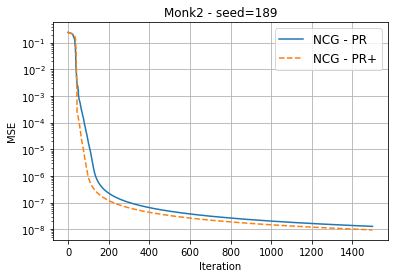

In [47]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')    
plt.show()


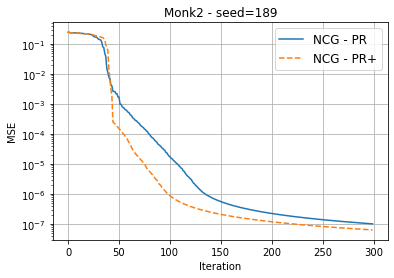

In [49]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_pr["loss_mse"][:zoom], linestyle='-')
plt.plot(h_pr_plus["loss_mse"][:zoom], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')    
plt.show()

# Monk 1 ln_maxiter = 100

In [50]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

    model.set_optimizer(optimizer)

    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)

    return model

In [96]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 206 #874 #206 #56
ln_maxiter = 100
results = []

Load Monk DataSet


In [97]:
#############################
#          NCG pr
#############################
optimizer = NCG(beta_method="pr", c1=1e-4, c2=.4, ln_maxiter = ln_maxiter, tol = 1e-14)
model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_pr = model.history 

Build the model

Alpha: 0.0824501614813726 - norm_g: 0.0211999915986544
Epoch: 1 - time: 0.0030 - loss_train: 0.24999994411488569 - loss_val: 0

Beta: 0.32847010397628407 -> compute alpha: Alpha: 393.03076095204983 - norm_g: 0.008665648525836844
Epoch: 2 - time: 0.0120 - loss_train: 0.2461540289765372 - loss_val: 0

Beta: 858906.5023958776 -> compute alpha: Alpha: 3.5635410479417445e-05 - norm_g: 8.033410116465507
Epoch: 3 - time: 0.0050 - loss_train: 0.24618860945147544 - loss_val: 0

Beta: 0.09393108372776646 -> compute alpha: Alpha: 0.001166216518453968 - norm_g: 8.722865179443007
Epoch: 4 - time: 0.0040 - loss_train: 0.24547001533920196 - loss_val: 0

Beta: 0.2757543012141321 -> compute alpha: Alpha: 0.03980143326734092 - norm_g: 10.65260718265245
Epoch: 5 - time: 0.0040 - loss_train: 0.17391140210373773 - loss_val: 0

Beta: -0.08405663602456363 -> compute alpha: Alpha: 0.038739595271368936 - norm_g: 7.399029559072113
Epoch: 6 - time: 0.0050 - loss_train: 0.16040787879636045 - loss

In [98]:
#############################
#          NCG pr+
#############################
optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.4, ln_maxiter = ln_maxiter, tol = 1e-14)
model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_pr_plus = model.history 

Build the model

Alpha: 0.0824501614813726 - norm_g: 0.0211999915986544
Epoch: 1 - time: 0.0030 - loss_train: 0.24999994411488569 - loss_val: 0

Beta: 0.32847010397628407 -> compute alpha: Alpha: 393.03076095204983 - norm_g: 0.008665648525836844
Epoch: 2 - time: 0.0100 - loss_train: 0.2461540289765372 - loss_val: 0

Beta: 858906.5023958776 -> compute alpha: Alpha: 3.5635410479417445e-05 - norm_g: 8.033410116465507
Epoch: 3 - time: 0.0040 - loss_train: 0.24618860945147544 - loss_val: 0

Beta: 0.09393108372776646 -> compute alpha: Alpha: 0.001166216518453968 - norm_g: 8.722865179443007
Epoch: 4 - time: 0.0050 - loss_train: 0.24547001533920196 - loss_val: 0

Beta: 0.2757543012141321 -> compute alpha: Alpha: 0.03980143326734092 - norm_g: 10.65260718265245
Epoch: 5 - time: 0.0030 - loss_train: 0.17391140210373773 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 0.03865700132052277 - norm_g: 7.399029559072113
Epoch: 6 - time: 0.0030 - loss_train: 0.16235282542860338 - loss_val: 0

Beta: 1.223

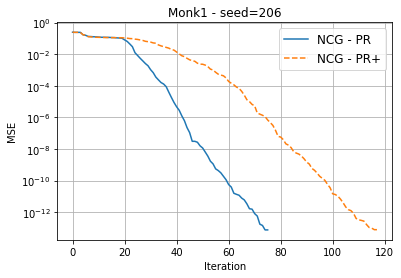

In [99]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')    
plt.show()
